In [2]:
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times New Roman"]
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.cbook import get_sample_data
import numpy as np


def add_image(ax, pos, path, zoom, flip=False):
    """Adds an image to the given Axes instance ax."""
    data = plt.imread(get_sample_data(path))
    if flip:
        data = data[::-1]
    imagebox = OffsetImage(data, zoom=zoom)
    ab = AnnotationBbox(imagebox, pos)
    ax.add_artist(ab)

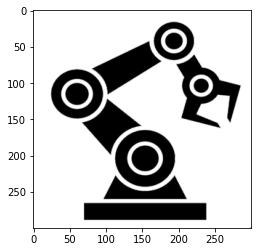

In [41]:
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import copy
path = 'pngegg.png'
l=300
w=300
# Load the image
image = Image.open(path).resize((l, w))

def get_logo_io_with_color(image_x, color=[0, 0, 255]):
    image_ = copy.deepcopy(image_x)
    data = np.array(image_)
    # Change all black (also near black) pixels to blue
    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    black_areas = (red < 50) & (green < 50) & (blue < 50)
    data[..., :3][black_areas] = color
    img = Image.fromarray(data)
    oi = OffsetImage(img, zoom=0.2)
    return oi

imgplot = plt.imshow(np.array(image))

In [129]:
def draw_grid_world(particle_poses, goal_poses, grid_size=5, border_size=1, arrow_poses=[(0,0)], arrow_directions=['r'], save_params = []):
    fig, ax = plt.subplots(figsize=(4, 4))

    # Calculate total size
    total_size = grid_size 

    # Draw grid
    ax.set_facecolor('black')
    ax.grid(which='major', axis='both', linestyle='-', color='grey', linewidth=2)
    ax.set_xticks([x for x in range(1, total_size)], minor=False)
    ax.set_yticks([y for y in range(1, total_size)], minor=False)

    # Draw cells
    goal_cell = (3,1)
    for i in range(total_size):
        for j in range(total_size):
            if i == goal_cell[0] and j == goal_cell[1]:
                color = 'blue'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black', alpha=0.5)
                ax.add_patch(cell)
            else:
                color = 'black' 
                # if i < border_size or j < border_size or i >= total_size - border_size or j >= total_size - border_size else 'black'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(cell)

    for i in range(len(particle_poses)):
        particle_pos = particle_poses[i]
        # Adjust particle and goal positions to center
        particle_pos_adjusted = (particle_pos[0] + border_size + 0.5, particle_pos[1] + border_size + 0.5)

        # Draw particle
        particle_orient = particle_pos[2]
        # particle = patches.RegularPolygon(particle_pos_adjusted, numVertices=3, radius=0.3, orientation=particle_orient, color='blue' if i==0 else 'green')
        # ax.add_patch(particle)
        color = None
        w_margin = -0.3
        h_margin = -0.7
        font_color = 'white'
        fonts = 18
        if i==0:
            color = [137, 141, 233]
            if len(particle_poses) > 1:
                ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_i$', fontsize=fonts, color=font_color, zorder=20)
            else:
                pass
                # ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = [137, 233, 179]
            ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_j$', fontsize=fonts, color=font_color, zorder=20)

        oi = get_logo_io_with_color(image, color)
        box = AnnotationBbox(oi, (particle_pos[0] + 0.5, particle_pos[1] + 0.5), frameon=False)
        ax.add_artist(box)


    for i in range(len(goal_poses)):
        goal_pos = goal_poses[i]
        goal_pos_adjusted = (goal_pos[0] + border_size + 0.5, goal_pos[1] + border_size + 0.5)
        w_margin = 0.6
        h_margin = -0.0
        font_color = 'white'
        fonts = 20
        # Draw goal
        if i==0:
            color = 'blue'

            # if len(goal_poses) > 1:
            #     ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
            # else:
            #     ax.text(goal_pos_adjusted[0]-0.3, goal_pos_adjusted[1]+0.9, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = 'red'
            ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_2$', fontsize=fonts, color=font_color, zorder=20)
        # goal = patches.Rectangle((goal_pos[0] + border_size + 0.25, goal_pos[1] + border_size + 0.25), 0.5, 0.5, color=color)
        # ax.add_patch(goal)
    
    # rewards for differnt rectangles
    particle_pos_adjusted = (particle_pos[0] + 0.5, particle_pos[1] + 0.5)
    ax.text(particle_pos_adjusted[0]+0.63, particle_pos_adjusted[1]+0.15, r'$0.6$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+1.65, particle_pos_adjusted[1]+0.15, r'$0.7$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+2.65, particle_pos_adjusted[1]+0.15, r'$0.8$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+2.65, particle_pos_adjusted[1]+1.15, r'$1.0$', fontsize=fonts, color='green', zorder=20)

    for i in range(len(arrow_poses)):
        arrow_pos = arrow_poses[i]
        arrow_direction = arrow_directions[i]
        # Draw arrow
        def get_start_end(pow, direction):
            s, e = None, None
            if direction=='r':
                s = (arrow_pos[0], arrow_pos[1] + 0.5)
                e = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
            elif direction=='d':
                s = (arrow_pos[0] + 0.5, arrow_pos[1])
                e = (arrow_pos[0] + 0.5, arrow_pos[1]+ 1)
            elif direction == 'l':
                s = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
                e = (arrow_pos[0], arrow_pos[1] + 0.5)
            elif direction == 'u':
                s = (arrow_pos[0] + 0.5, arrow_pos[1] + 1)
                e = (arrow_pos[0] + 0.5, arrow_pos[1])
            return s,e
        def draw_arrow(ax, spos, epos, ifarrow = True):
            arrow_width = 0.001
            if ifarrow:
                arrow_width = 0.2
            fc_color = 'red'
            ec_color = 'red'
            ax.arrow(*spos, *(epos[0] - spos[0], epos[1] - spos[1]), head_width=arrow_width, head_length=arrow_width, fc=fc_color, ec=ec_color, alpha=0.7)

        arrow_direction_0 = arrow_direction[0]
        arrow_direction_1 = arrow_direction[1]
        s0, e0 = get_start_end(arrow_pos,arrow_direction_0)
        s1, e1 = get_start_end(arrow_pos,arrow_direction_1)
        mid = (arrow_pos[0] + 0.5, arrow_pos[1] + 0.5)
        draw_arrow(ax, s0, mid, ifarrow=False)
        draw_arrow(ax, mid, e1)

    ax.text(0.51, 5.5, save_params[1], zorder=20, fontsize=18, color='black', )
    # Set limits
    ax.set_xlim(0, total_size)
    ax.set_ylim(0, total_size)

    # Remove labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_aspect('equal')  # Set equal aspect ratio

    plt.gca().invert_yaxis()  # Invert y-axis
    if len(save_params) != 0:
        plt.savefig(save_params[0],bbox_inches='tight', dpi=200, pad_inches = 0)

    plt.show()


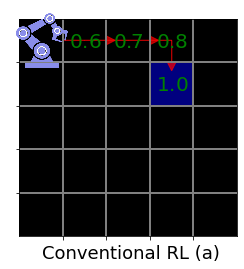

In [130]:
# Set parameters for g_1
particle_position = [(0, 0, -np.pi/2)]
goal_position = [(3, 1)]
grid_size = 5
path1_poses = [(1,0), (2,0), (3,0)]
path1_directions = ["rr","rr","rd"]

arrow_poses = path1_poses
arrow_directions = path1_directions
# Draw the grid world
save_params = ["robot_figa_conventional.pdf",'Conventional RL (a)']
draw_grid_world(particle_position, goal_position, grid_size, arrow_poses=arrow_poses, arrow_directions=arrow_directions, save_params=save_params)

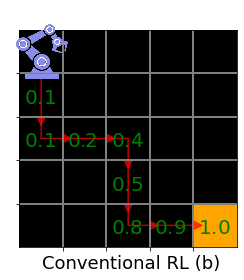

In [115]:
def draw_grid_world(particle_poses, goal_poses, grid_size=5, border_size=1, arrow_poses=[(0,0)], arrow_directions=['r'], save_params = []):
    fig, ax = plt.subplots(figsize=(4, 4))

    # Calculate total size
    total_size = grid_size

    # Draw grid
    ax.set_facecolor('black')
    ax.grid(which='major', axis='both', linestyle='-', color='grey', linewidth=2)
    ax.set_xticks([x for x in range(1, total_size)], minor=False)
    ax.set_yticks([y for y in range(1, total_size)], minor=False)

    # Draw cells
    goal_cell = (4,4)
    for i in range(total_size):
        for j in range(total_size):
            if i == goal_cell[0] and j == goal_cell[1]:
                color = 'orange'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(cell)
            else:
                color = 'black' 
                # if i < border_size or j < border_size or i >= total_size - border_size or j >= total_size - border_size else 'black'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(cell)

    for i in range(len(particle_poses)):
        particle_pos = particle_poses[i]
        # Adjust particle and goal positions to center
        particle_pos_adjusted = (particle_pos[0] + 0.5, particle_pos[1] + 0.5)

        # Draw particle
        particle_orient = particle_pos[2]
        # particle = patches.RegularPolygon(particle_pos_adjusted, numVertices=3, radius=0.3, orientation=particle_orient, color='blue' if i==0 else 'green')
        # ax.add_patch(particle)
        color = None
        w_margin = -0.3
        h_margin = -0.7
        font_color = 'white'
        fonts = 18
        if i==0:
            color = [137, 141, 233]
            if len(particle_poses) > 1:
                ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_i$', fontsize=fonts, color=font_color, zorder=20)
            else:
                ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = [137, 233, 179]
            ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_j$', fontsize=fonts, color=font_color, zorder=20)

        oi = get_logo_io_with_color(image, color)
        box = AnnotationBbox(oi, particle_pos_adjusted, frameon=False)
        ax.add_artist(box)


    for i in range(len(goal_poses)):
        goal_pos = goal_poses[i]
        goal_pos_adjusted = (goal_pos[0] + 0.5, goal_pos[1] + 0.5)
        w_margin = 0.6
        h_margin = -0.0
        font_color = 'white'
        fonts = 20
        # Draw goal
        if i==0:
            color = 'blue'

            # if len(goal_poses) > 1:
            #     ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
            # else:
            #     ax.text(goal_pos_adjusted[0]-0.3, goal_pos_adjusted[1]+0.9, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = 'red'
            ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_2$', fontsize=fonts, color=font_color, zorder=20)
        # goal = patches.Rectangle((goal_pos[0] + border_size + 0.25, goal_pos[1] + border_size + 0.25), 0.5, 0.5, color='red')
        # ax.add_patch(goal)
    
    # rewards for differnt rectangles
    particle_pos_adjusted = (particle_pos[0] + 0.5, particle_pos[1] + 0.5)

    ax.text(particle_pos_adjusted[0]-0.4, particle_pos_adjusted[1]+1.2, r'$0.1$', fontsize=fonts, color='green', zorder=20)

    ax.text(particle_pos_adjusted[0]-0.4, particle_pos_adjusted[1]+2.2, r'$0.1$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+0.6, particle_pos_adjusted[1]+2.2, r'$0.2$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+1.6, particle_pos_adjusted[1]+2.2, r'$0.4$', fontsize=fonts, color='green', zorder=20)

    ax.text(particle_pos_adjusted[0]+1.6, particle_pos_adjusted[1]+3.2, r'$0.5$', fontsize=fonts, color='green', zorder=20)

    ax.text(particle_pos_adjusted[0]+1.6, particle_pos_adjusted[1]+4.2, r'$0.8$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+2.6, particle_pos_adjusted[1]+4.2, r'$0.9$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+3.6, particle_pos_adjusted[1]+4.2, r'$1.0$', fontsize=fonts, color='green', zorder=20)

    for i in range(len(arrow_poses)):
        arrow_pos = arrow_poses[i]
        arrow_direction = arrow_directions[i]
        # Draw arrow
        def get_start_end(pow, direction):
            s, e = None, None
            if direction=='r':
                s = (arrow_pos[0], arrow_pos[1] + 0.5)
                e = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
            elif direction=='d':
                s = (arrow_pos[0] + 0.5, arrow_pos[1])
                e = (arrow_pos[0] + 0.5, arrow_pos[1] + 1)
            elif direction == 'l':
                s = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
                e = (arrow_pos[0], arrow_pos[1] + 0.5)
            elif direction == 'u':
                s = (arrow_pos[0] + 0.5, arrow_pos[1] + 1)
                e = (arrow_pos[0] + 0.5, arrow_pos[1])
            return s,e
        def draw_arrow(ax, spos, epos, ifarrow = True):
            arrow_width = 0.001
            if ifarrow:
                arrow_width = 0.2
            fc_color = 'red'
            ec_color = 'red'
            ax.arrow(*spos, *(epos[0] - spos[0], epos[1] - spos[1]), head_width=arrow_width, head_length=arrow_width, fc=fc_color, ec=ec_color, alpha=0.7)

        arrow_direction_0 = arrow_direction[0]
        arrow_direction_1 = arrow_direction[1]
        s0, e0 = get_start_end(arrow_pos,arrow_direction_0)
        s1, e1 = get_start_end(arrow_pos,arrow_direction_1)
        mid = (arrow_pos[0] + 0.5, arrow_pos[1] + 0.5)
        draw_arrow(ax, s0, mid, ifarrow=False)
        draw_arrow(ax, mid, e1)

    ax.text(0.51, 5.5, save_params[1], zorder=20, fontsize=18, color='black', )
    # Set limits
    ax.set_xlim(0, total_size)
    ax.set_ylim(0, total_size)

    # Remove labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_aspect('equal')  # Set equal aspect ratio

    plt.gca().invert_yaxis()  # Invert y-axis
    if len(save_params) != 0:
        plt.savefig(save_params[0],bbox_inches='tight', dpi=200, pad_inches = 0)

    plt.show()

# Set parameters for g_1
particle_position = [(0, 0, -np.pi/2)]
goal_position = [(4, 4)]
grid_size = 5

path2_poses = [(0,1), (0,2), (1,2), (2,2), (2,3), (2,4), (3,4)]
path2_directions = ['dd', 'dr', 'rr', 'rd', 'dd', 'dr', 'rr']

arrow_poses = path2_poses
arrow_directions = path2_directions
# Draw the grid world
save_params = ["robot_figb_conventional.pdf",'Conventional RL (b)']
draw_grid_world(particle_position, goal_position, grid_size, arrow_poses=arrow_poses, arrow_directions=arrow_directions, save_params=save_params)

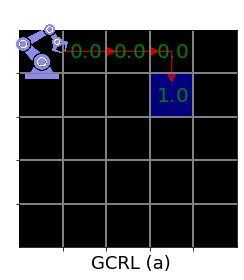

In [124]:
def draw_grid_world(particle_poses, goal_poses, grid_size=5, border_size=1, arrow_poses=[(0,0)], arrow_directions=['r'], save_params = []):
    fig, ax = plt.subplots(figsize=(4, 4))

    # Calculate total size
    total_size = grid_size

    # Draw grid
    ax.set_facecolor('black')
    ax.grid(which='major', axis='both', linestyle='-', color='grey', linewidth=2)
    ax.set_xticks([x for x in range(1, total_size)], minor=False)
    ax.set_yticks([y for y in range(1, total_size)], minor=False)

    # Draw cells
    goal_cell = (3, 1)
    for i in range(total_size):
        for j in range(total_size):
            if i == goal_cell[0] and j == goal_cell[1]:
                color = 'blue'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black', alpha=0.5)
                ax.add_patch(cell)
            else:
                color = 'black' 
                # if i < border_size or j < border_size or i >= total_size - border_size or j >= total_size - border_size else 'black'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(cell)

    for i in range(len(particle_poses)):
        particle_pos = particle_poses[i]
        # Adjust particle and goal positions to center
        particle_pos_adjusted = (particle_pos[0] + 0.5, particle_pos[1] + 0.5)

        # Draw particle
        particle_orient = particle_pos[2]
        # particle = patches.RegularPolygon(particle_pos_adjusted, numVertices=3, radius=0.3, orientation=particle_orient, color='blue' if i==0 else 'green')
        # ax.add_patch(particle)
        color = None
        w_margin = -0.3
        h_margin = -0.7
        font_color = 'white'
        fonts = 18
        if i==0:
            color = [137, 141, 233]
            if len(particle_poses) > 1:
                ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_i$', fontsize=fonts, color=font_color, zorder=20)
            else:
                ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = [137, 233, 179]
            ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_j$', fontsize=fonts, color=font_color, zorder=20)

        oi = get_logo_io_with_color(image, color)
        box = AnnotationBbox(oi, particle_pos_adjusted, frameon=False)
        ax.add_artist(box)


    for i in range(len(goal_poses)):
        goal_pos = goal_poses[i]
        goal_pos_adjusted = (goal_pos[0] + 0.5, goal_pos[1] + 0.5)
        w_margin = 0.6
        h_margin = -0.0
        font_color = 'white'
        fonts = 20
        # Draw goal
        if i==0:
            color = 'blue'
            # if len(goal_poses) > 1:
            #     ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
            # else:
            #     ax.text(goal_pos_adjusted[0]-0.3, goal_pos_adjusted[1]+0.9, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = 'red'
            ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_2$', fontsize=fonts, color=font_color, zorder=20)
        # goal = patches.Rectangle((goal_pos[0] + border_size + 0.25, goal_pos[1] + border_size + 0.25), 0.5, 0.5, color=color)
        # ax.add_patch(goal)
    
    # rewards for differnt rectangles
    particle_pos_adjusted = (particle_pos[0] + 0.5, particle_pos[1] + 0.5)
    ax.text(particle_pos_adjusted[0]+0.63, particle_pos_adjusted[1]+0.15, r'$0.0$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+1.65, particle_pos_adjusted[1]+0.15, r'$0.0$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+2.65, particle_pos_adjusted[1]+0.15, r'$0.0$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+2.65, particle_pos_adjusted[1]+1.15, r'$1.0$', fontsize=fonts, color='green', zorder=20)

    for i in range(len(arrow_poses)):
        arrow_pos = arrow_poses[i]
        arrow_direction = arrow_directions[i]
        # Draw arrow
        def get_start_end(pow, direction):
            s, e = None, None
            if direction=='r':
                s = (arrow_pos[0], arrow_pos[1] + 0.5)
                e = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
            elif direction=='d':
                s = (arrow_pos[0] + 0.5, arrow_pos[1])
                e = (arrow_pos[0] + 0.5, arrow_pos[1] + 1)
            elif direction == 'l':
                s = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
                e = (arrow_pos[0], arrow_pos[1] + 0.5)
            elif direction == 'u':
                s = (arrow_pos[0] + 0.5, arrow_pos[1] + 1)
                e = (arrow_pos[0] + 0.5, arrow_pos[1])
            return s,e
        def draw_arrow(ax, spos, epos, ifarrow = True):
            arrow_width = 0.001
            if ifarrow:
                arrow_width = 0.2
            fc_color = 'red'
            ec_color = 'red'
            ax.arrow(*spos, *(epos[0] - spos[0], epos[1] - spos[1]), head_width=arrow_width, head_length=arrow_width, fc=fc_color, ec=ec_color, alpha=0.7)

        arrow_direction_0 = arrow_direction[0]
        arrow_direction_1 = arrow_direction[1]
        s0, e0 = get_start_end(arrow_pos,arrow_direction_0)
        s1, e1 = get_start_end(arrow_pos,arrow_direction_1)
        mid = (arrow_pos[0] + 0.5, arrow_pos[1] + 0.5)
        draw_arrow(ax, s0, mid, ifarrow=False)
        draw_arrow(ax, mid, e1)

    ax.text(1.6, 5.5, save_params[1], zorder=20, fontsize=18, color='black', )
    # Set limits
    ax.set_xlim(0, total_size)
    ax.set_ylim(0, total_size)

    # Remove labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_aspect('equal')  # Set equal aspect ratio

    plt.gca().invert_yaxis()  # Invert y-axis
    if len(save_params) != 0:
        plt.savefig(save_params[0],bbox_inches='tight', dpi=200, pad_inches = 0)

    plt.show()

# Set parameters for g_1
particle_position = [(0, 0, -np.pi/2)]
goal_position = [(3, 1)]
grid_size = 5
path1_poses = [(1,0), (2,0), (3,0)]
path1_directions = ["rr","rr","rd"]

arrow_poses = path1_poses
arrow_directions = path1_directions
# Draw the grid world
save_params = ["robot_figa_gcrl.pdf",'GCRL (a)']
draw_grid_world(particle_position, goal_position, grid_size, arrow_poses=arrow_poses, arrow_directions=arrow_directions, save_params=save_params)

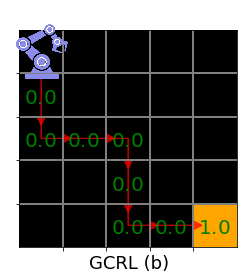

In [126]:
def draw_grid_world(particle_poses, goal_poses, grid_size=5, border_size=1, arrow_poses=[(0,0)], arrow_directions=['r'], save_params = []):
    fig, ax = plt.subplots(figsize=(4, 4))

    # Calculate total size
    total_size = grid_size

    # Draw grid
    ax.set_facecolor('black')
    ax.grid(which='major', axis='both', linestyle='-', color='grey', linewidth=2)
    ax.set_xticks([x for x in range(1, total_size)], minor=False)
    ax.set_yticks([y for y in range(1, total_size)], minor=False)

    # Draw cells
    goal_cell = (4,4)
    for i in range(total_size):
        for j in range(total_size):
            if i == goal_cell[0] and j == goal_cell[1]:
                color = 'orange'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(cell)
            else:
                color = 'black' 
                # if i < border_size or j < border_size or i >= total_size - border_size or j >= total_size - border_size else 'black'
                cell = patches.Rectangle((i,j), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(cell)

    for i in range(len(particle_poses)):
        particle_pos = particle_poses[i]
        # Adjust particle and goal positions to center
        particle_pos_adjusted = (particle_pos[0] + 0.5, particle_pos[1] + 0.5)

        # Draw particle
        particle_orient = particle_pos[2]
        # particle = patches.RegularPolygon(particle_pos_adjusted, numVertices=3, radius=0.3, orientation=particle_orient, color='blue' if i==0 else 'green')
        # ax.add_patch(particle)
        color = None
        w_margin = -0.3
        h_margin = -0.7
        font_color = 'white'
        fonts = 18
        if i==0:
            color = [137, 141, 233]
            if len(particle_poses) > 1:
                ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_i$', fontsize=fonts, color=font_color, zorder=20)
            else:
                ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = [137, 233, 179]
            ax.text(particle_pos_adjusted[0]+w_margin, particle_pos_adjusted[1]+h_margin, r'$s_j$', fontsize=fonts, color=font_color, zorder=20)

        oi = get_logo_io_with_color(image, color)
        box = AnnotationBbox(oi, particle_pos_adjusted, frameon=False)
        ax.add_artist(box)


    for i in range(len(goal_poses)):
        goal_pos = goal_poses[i]
        goal_pos_adjusted = (goal_pos[0] + 0.5, goal_pos[1] + 0.5)
        w_margin = 0.6
        h_margin = -0.0
        font_color = 'white'
        fonts = 20
        # Draw goal
        if i==0:
            color = 'blue'

            # if len(goal_poses) > 1:
            #     ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
            # else:
            #     ax.text(goal_pos_adjusted[0]-0.3, goal_pos_adjusted[1]+0.9, r'$g_1$', fontsize=fonts, color=font_color, zorder=20)
        elif i==1:
            color = 'red'
            ax.text(goal_pos_adjusted[0]+w_margin, goal_pos_adjusted[1]+h_margin, r'$g_2$', fontsize=fonts, color=font_color, zorder=20)
        # goal = patches.Rectangle((goal_pos[0] + border_size + 0.25, goal_pos[1] + border_size + 0.25), 0.5, 0.5, color='red')
        # ax.add_patch(goal)
    
    # rewards for differnt rectangles
    particle_pos_adjusted = (particle_pos[0] + 0.5, particle_pos[1] + 0.5)

    ax.text(particle_pos_adjusted[0]-0.4, particle_pos_adjusted[1]+1.2, r'$0.0$', fontsize=fonts, color='green', zorder=20)

    ax.text(particle_pos_adjusted[0]-0.4, particle_pos_adjusted[1]+2.2, r'$0.0$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+0.6, particle_pos_adjusted[1]+2.2, r'$0.0$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+1.6, particle_pos_adjusted[1]+2.2, r'$0.0$', fontsize=fonts, color='green', zorder=20)

    ax.text(particle_pos_adjusted[0]+1.6, particle_pos_adjusted[1]+3.2, r'$0.0$', fontsize=fonts, color='green', zorder=20)

    ax.text(particle_pos_adjusted[0]+1.6, particle_pos_adjusted[1]+4.2, r'$0.0$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+2.6, particle_pos_adjusted[1]+4.2, r'$0.0$', fontsize=fonts, color='green', zorder=20)
    ax.text(particle_pos_adjusted[0]+3.6, particle_pos_adjusted[1]+4.2, r'$1.0$', fontsize=fonts, color='green', zorder=20)
    
    for i in range(len(arrow_poses)):
        arrow_pos = arrow_poses[i]
        arrow_direction = arrow_directions[i]
        # Draw arrow
        def get_start_end(pow, direction):
            s, e = None, None
            if direction=='r':
                s = (arrow_pos[0], arrow_pos[1] +0.5)
                e = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
            elif direction=='d':
                s = (arrow_pos[0] + 0.5, arrow_pos[1])
                e = (arrow_pos[0] + 0.5, arrow_pos[1] + 1)
            elif direction == 'l':
                s = (arrow_pos[0] + 1, arrow_pos[1] + 0.5)
                e = (arrow_pos[0], arrow_pos[1] + 0.5)
            elif direction == 'u':
                s = (arrow_pos[0] + 0.5, arrow_pos[1] + 1)
                e = (arrow_pos[0] + 0.5, arrow_pos[1])
            return s,e
        def draw_arrow(ax, spos, epos, ifarrow = True):
            arrow_width = 0.001
            if ifarrow:
                arrow_width = 0.2
            fc_color = 'red'
            ec_color = 'red'
            ax.arrow(*spos, *(epos[0] - spos[0], epos[1] - spos[1]), head_width=arrow_width, head_length=arrow_width, fc=fc_color, ec=ec_color, alpha=0.7)

        arrow_direction_0 = arrow_direction[0]
        arrow_direction_1 = arrow_direction[1]
        s0, e0 = get_start_end(arrow_pos,arrow_direction_0)
        s1, e1 = get_start_end(arrow_pos,arrow_direction_1)
        mid = (arrow_pos[0] + 0.5, arrow_pos[1] + 0.5)
        draw_arrow(ax, s0, mid, ifarrow=False)
        draw_arrow(ax, mid, e1)

    ax.text(1.6, 5.5, save_params[1], zorder=20, fontsize=18, color='black', )
    # Set limits
    ax.set_xlim(0, total_size)
    ax.set_ylim(0, total_size)

    # Remove labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_aspect('equal')  # Set equal aspect ratio

    plt.gca().invert_yaxis()  # Invert y-axis
    if len(save_params) != 0:
        plt.savefig(save_params[0],bbox_inches='tight', dpi=200, pad_inches = 0)

    plt.show()

# Set parameters for g_1
particle_position = [(0, 0, -np.pi/2)]
goal_position = [(4, 4)]
grid_size = 5

path2_poses = [(0,1), (0,2), (1,2), (2,2), (2,3), (2,4), (3,4)]
path2_directions = ['dd', 'dr', 'rr', 'rd', 'dd', 'dr', 'rr']

arrow_poses = path2_poses
arrow_directions = path2_directions
# Draw the grid world
save_params = ["robot_figb_gcrl.pdf",'GCRL (b)']
draw_grid_world(particle_position, goal_position, grid_size, arrow_poses=arrow_poses, arrow_directions=arrow_directions, save_params=save_params)

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['L-1', 'L-2', 'L-3']
discounted_returns = [9.8, 7.83, 8.83]  # Example data

# Plot
fig, ax = plt.subplots()
ax.bar(categories, discounted_returns, color=['blue', 'green', 'red'])

# Adding labels and title
ax.set_xlabel('Layers')
ax.set_ylabel('Discounted Return')
ax.set_title('FetchPick Task Performance')

# Show the plot
plt.show()